# Machine Learning


You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep keras/data/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [4]:
df.columns

Index(['sqft', 'bdrms', 'age', 'price'], dtype='object')

In [5]:
# create 2 variables called X and y:
# X shall be a matrix with 3 columns (sqft,bdrms,age)
# and y shall be a vector with 1 column (price)
X = df[['sqft', 'bdrms', 'age']].values
y = df['price'].values

In [6]:
X

array([[2104,    3,   70],
       [1600,    3,   28],
       [2400,    3,   44],
       [1416,    2,   49],
       [3000,    4,   75],
       [1985,    4,   61],
       [1534,    3,   12],
       [1427,    3,   57],
       [1380,    3,   14],
       [1494,    3,   15],
       [1940,    4,    7],
       [2000,    3,   27],
       [1890,    3,   45],
       [4478,    5,   49],
       [1268,    3,   58],
       [2300,    4,   77],
       [1320,    2,   62],
       [1236,    3,   78],
       [2609,    4,    5],
       [3031,    4,   21],
       [1767,    3,   44],
       [1888,    2,   79],
       [1604,    3,   13],
       [1962,    4,   53],
       [3890,    3,   36],
       [1100,    3,   60],
       [1458,    3,   29],
       [2526,    3,   13],
       [2200,    3,   28],
       [2637,    3,   25],
       [1839,    2,   40],
       [1000,    1,    5],
       [2040,    4,   75],
       [3137,    3,   67],
       [1811,    4,   24],
       [1437,    3,   50],
       [1239,    3,   22],
 

In [7]:
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500])

In [8]:
!pip install keras
!pip install tensorflow

In [9]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

In [10]:
# create a linear regression model in Keras
# with the appropriate number of inputs and output
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(learning_rate=0.8),'mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# split the data into train and test with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# train the model on the training set and check its accuracy on training and test set
# how's your model doing? Is the loss growing smaller?
model.fit(X_train, y_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 133998321664.0000 


In [14]:
from sklearn.metrics import r2_score

In [15]:
# check the R2score on training and test set (probably very bad)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:     {:} ".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:      {:}".format(r2_score(y_test, y_test_pred)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The R2 score on the Train set is:     -7.356035232543945 
The R2 score on the Test set is:      -8.204462051391602


In [16]:
# try to improve your model with these experiments:
#     - normalize the input features with one of the rescaling techniques mentioned above
#     - use a different value for the learning rate of your model
#     - use a different optimizer

<Axes: ylabel='Frequency'>

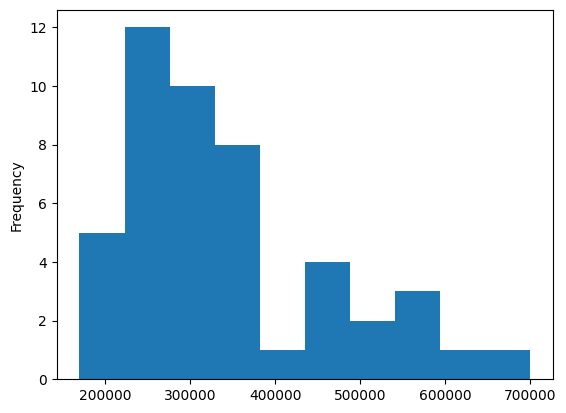

In [17]:
df['price'].plot(kind='hist')

In [18]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [19]:
df['sqft1000'] = df['sqft']/1000
df['age10'] = df['age']/10
df['price100k'] = df['price']/100000

In [20]:
X = df[['sqft1000', 'bdrms', 'age10']].values
y = df['price100k'].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(learning_rate=0.1), 'mean_squared_error')
model.fit(X_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.7664
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 1.6200
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 1.3569 
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 1.2545 
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 1.2461
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 1.1326
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.1224
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.3868
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.2133
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.0476 
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.2376
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.9844
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.8515 
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.0147 
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.0725 
Epoch 16/20
2/2 ━━━━━━━━━━━━━━━━━━━━

In [24]:
# once you're satisfied with training, check the R2score on the test set

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:    {:}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:     {:}".format(r2_score(y_test, y_test_pred)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
The R2 score on the Train set is:    0.45483318409145035
The R2 score on the Test set is:     0.14581355099531113


In [25]:
model.fit(X_train, y_train, epochs=40 , verbose=0)

In [26]:
# once you're satisfied with training, check the R2score on the test set

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:   {:}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:    {:}".format(r2_score(y_test, y_test_pred)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The R2 score on the Train set is:   0.7091847633350119
The R2 score on the Test set is:    0.6899444933830243
